In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv(r'/content/drive/MyDrive/LargeTrial.csv')


# Display the first few rows of the dataframe and its summary
data.head(), data.describe()


Mounted at /content/drive


(   Label                               tokenized_Transcript  Prediction
 0      1  represent people year system letter prisioner ...         0.0
 1      1  reform criminal justice system matter law legi...         0.0
 2      1  tell say accident say accident ian fine accide...         0.0
 3      1  uh office get uh maybe close o clock remember ...         0.0
 4      1                   yes yep stay uh yep prob yes yes         0.0,
             Label  Prediction
 count  121.000000  121.000000
 mean     0.495868    0.057851
 std      0.502062    0.234433
 min      0.000000    0.000000
 25%      0.000000    0.000000
 50%      0.000000    0.000000
 75%      1.000000    0.000000
 max      1.000000    1.000000)

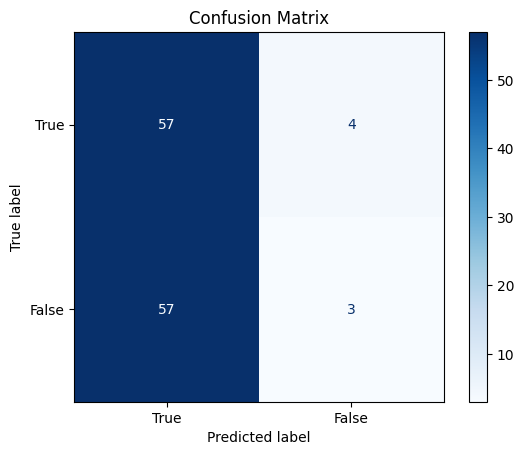

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure predictions are integers, if not already
data['Prediction'] = data['Prediction'].astype(int)

# Calculate confusion matrix
cm = confusion_matrix(data['Label'], data['Prediction'])

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])
disp.plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [3]:
# Map the numeric values to 'True' and 'False' in 'Label' and 'Prediction'
data['Label'] = data['Label'].map({1: 'True', 0: 'False'})
data['Prediction'] = data['Prediction'].map({1: 'True', 0: 'False'})

In [4]:
# Aggregate the counts of each unique value in 'Label' and 'Prediction' columns
label_counts = data['Label'].value_counts()
prediction_counts = data['Prediction'].value_counts()

# Ensure both Series have the same index for comparison
all_labels = sorted(set(label_counts.index).union(set(prediction_counts.index)))
label_counts = label_counts.reindex(all_labels, fill_value=0)
prediction_counts = prediction_counts.reindex(all_labels, fill_value=0)

# Create a DataFrame to plot
plot_data = pd.DataFrame({
    'Label': label_counts,
    'Prediction': prediction_counts
})



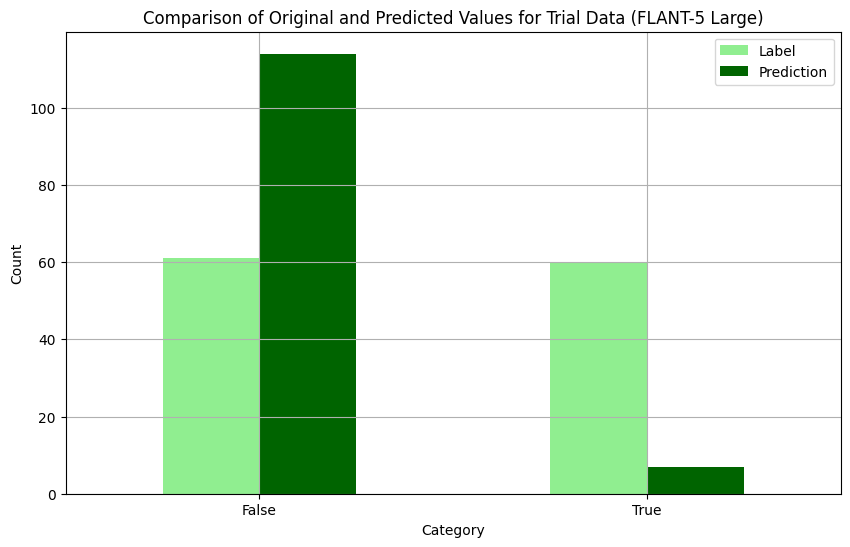

In [5]:
# Plotting
plot_data.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'darkgreen'])
plt.title('Comparison of Original and Predicted Values for Trial Data (FLANT-5 Large)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.show()